In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
data = pd.read_csv('./movie_data/tmdb_5000_movies.csv')

In [3]:
data

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [4]:
print(list(data.columns))

['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count']


In [5]:
data.shape

(4803, 20)

In [6]:
data = data[['id','genres', 'vote_average', 'vote_count','popularity','title',  'keywords', 'overview']]

In [7]:
data

,id,genres,vote_average,vote_count,popularity,title,keywords,overview
0,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",7.2,11800,150.437577,Avatar,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di..."
1,285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",6.9,4500,139.082615,Pirates of the Caribbean: At World's End,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha..."
2,206647,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",6.3,4466,107.376788,Spectre,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...
3,49026,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",7.6,9106,112.312950,The Dark Knight Rises,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...
4,49529,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",6.1,2124,43.926995,John Carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca..."
...,...,...,...,...,...,...,...,...
4798,9367,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",6.6,238,14.269792,El Mariachi,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",El Mariachi just wants to play his guitar and ...
4799,72766,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",5.9,5,0.642552,Newlyweds,[],A newlywed couple's honeymoon is upended by th...
4800,231617,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",7.0,6,1.444476,"Signed, Sealed, Delivered","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","""Signed, Sealed, Delivered"" introduces a dedic..."
4801,126186,[],5.7,7,0.857008,Shanghai Calling,[],When ambitious New York attorney Sam is sent t...


In [8]:
tmp_m = data['vote_count'].quantile(0.89)
tmp_m

1683.8999999999987

In [9]:
tmp_data = data.copy().loc[data['vote_count'] >= tmp_m]
tmp_data.shape

(529, 8)

In [10]:
del tmp_data

m = data['vote_count'].quantile(0.9)
data = data.loc[data['vote_count'] >= m]

In [11]:
data.shape

(481, 8)

In [12]:

C = data['vote_average'].mean()

In [13]:
m

1838.4000000000015

In [14]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']

    return ( v / (v+m) * R ) + (m / (m + v) * C)

In [15]:
data['score'] = data.apply(weighted_rating, axis = 1)

/var/folders/50/l1xpjcld4v986zh9v4c5yq_w0000gn/T/ipykernel_99177/329418326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['score'] = data.apply(weighted_rating, axis = 1)


In [16]:
data

,id,genres,vote_average,vote_count,popularity,title,keywords,overview,score
0,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",7.2,11800,150.437577,Avatar,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",7.168053
1,285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",6.9,4500,139.082615,Pirates of the Caribbean: At World's End,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",6.918271
2,206647,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",6.3,4466,107.376788,Spectre,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,6.493333
3,49026,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",7.6,9106,112.312950,The Dark Knight Rises,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,7.492998
4,49529,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",6.1,2124,43.926995,John Carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...",6.500396
...,...,...,...,...,...,...,...,...,...
4291,176,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",7.2,2184,63.655973,Saw,"[{""id"": 1366, ""name"": ""shotgun""}, {""id"": 13000...",Obsessed with teaching his victims the value o...,7.091679
4300,500,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 53, ""name...",8.0,3697,66.925866,Reservoir Dogs,"[{""id"": 2052, ""name"": ""traitor""}, {""id"": 6099,...",A botched robbery indicates a police informant...,7.655593
4302,429,"[{""id"": 37, ""name"": ""Western""}]",8.1,2311,88.377076,"The Good, the Bad and the Ugly","[{""id"": 801, ""name"": ""bounty hunter""}, {""id"": ...",While the Civil War rages between the Union an...,7.596247
4337,103,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",8.0,2535,58.845025,Taxi Driver,"[{""id"": 422, ""name"": ""vietnam veteran""}, {""id""...",A mentally unstable Vietnam War veteran works ...,7.564085


In [17]:
data.shape

(481, 9)

In [18]:
data['genres'] = data['genres'].apply(literal_eval)
data['keywords'] = data['keywords'].apply(literal_eval)

/var/folders/50/l1xpjcld4v986zh9v4c5yq_w0000gn/T/ipykernel_99177/1627362080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genres'] = data['genres'].apply(literal_eval)
/var/folders/50/l1xpjcld4v986zh9v4c5yq_w0000gn/T/ipykernel_99177/1627362080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['keywords'] = data['keywords'].apply(literal_eval)


In [19]:
data

,id,genres,vote_average,vote_count,popularity,title,keywords,overview,score
0,19995,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",7.2,11800,150.437577,Avatar,"[{'id': 1463, 'name': 'culture clash'}, {'id':...","In the 22nd century, a paraplegic Marine is di...",7.168053
1,285,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",6.9,4500,139.082615,Pirates of the Caribbean: At World's End,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","Captain Barbossa, long believed to be dead, ha...",6.918271
2,206647,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",6.3,4466,107.376788,Spectre,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",A cryptic message from Bond’s past sends him o...,6.493333
3,49026,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",7.6,9106,112.312950,The Dark Knight Rises,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",Following the death of District Attorney Harve...,7.492998
4,49529,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",6.1,2124,43.926995,John Carter,"[{'id': 818, 'name': 'based on novel'}, {'id':...","John Carter is a war-weary, former military ca...",6.500396
...,...,...,...,...,...,...,...,...,...
4291,176,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",7.2,2184,63.655973,Saw,"[{'id': 1366, 'name': 'shotgun'}, {'id': 13000...",Obsessed with teaching his victims the value o...,7.091679
4300,500,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",8.0,3697,66.925866,Reservoir Dogs,"[{'id': 2052, 'name': 'traitor'}, {'id': 6099,...",A botched robbery indicates a police informant...,7.655593
4302,429,"[{'id': 37, 'name': 'Western'}]",8.1,2311,88.377076,"The Good, the Bad and the Ugly","[{'id': 801, 'name': 'bounty hunter'}, {'id': ...",While the Civil War rages between the Union an...,7.596247
4337,103,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",8.0,2535,58.845025,Taxi Driver,"[{'id': 422, 'name': 'vietnam veteran'}, {'id'...",A mentally unstable Vietnam War veteran works ...,7.564085


In [20]:
data['genres'] = data['genres'].apply(lambda x : [d['name'] for d in x]).apply(lambda x : " ".join(x))
data['keywords'] = data['keywords'].apply(lambda x : [d['name'] for d in x]).apply(lambda x : " ".join(x))

/var/folders/50/l1xpjcld4v986zh9v4c5yq_w0000gn/T/ipykernel_99177/1666764706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genres'] = data['genres'].apply(lambda x : [d['name'] for d in x]).apply(lambda x : " ".join(x))
/var/folders/50/l1xpjcld4v986zh9v4c5yq_w0000gn/T/ipykernel_99177/1666764706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['keywords'] = data['keywords'].apply(lambda x : [d['name'] for d in x]).apply(lambda x : " ".join(x))


In [21]:
data

,id,genres,vote_average,vote_count,popularity,title,keywords,overview,score
0,19995,Action Adventure Fantasy Science Fiction,7.2,11800,150.437577,Avatar,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di...",7.168053
1,285,Adventure Fantasy Action,6.9,4500,139.082615,Pirates of the Caribbean: At World's End,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha...",6.918271
2,206647,Action Adventure Crime,6.3,4466,107.376788,Spectre,spy based on novel secret agent sequel mi6 bri...,A cryptic message from Bond’s past sends him o...,6.493333
3,49026,Action Crime Drama Thriller,7.6,9106,112.312950,The Dark Knight Rises,dc comics crime fighter terrorist secret ident...,Following the death of District Attorney Harve...,7.492998
4,49529,Action Adventure Science Fiction,6.1,2124,43.926995,John Carter,based on novel mars medallion space travel pri...,"John Carter is a war-weary, former military ca...",6.500396
...,...,...,...,...,...,...,...,...,...
4291,176,Horror Mystery Crime,7.2,2184,63.655973,Saw,shotgun based on short film sadist pistol chai...,Obsessed with teaching his victims the value o...,7.091679
4300,500,Crime Thriller,8.0,3697,66.925866,Reservoir Dogs,traitor jewelry psychopath thief heist betraya...,A botched robbery indicates a police informant...,7.655593
4302,429,Western,8.1,2311,88.377076,"The Good, the Bad and the Ugly",bounty hunter refugee gold anti hero gallows h...,While the Civil War rages between the Union an...,7.596247
4337,103,Crime Drama,8.0,2535,58.845025,Taxi Driver,vietnam veteran taxi obsession drug dealer nig...,A mentally unstable Vietnam War veteran works ...,7.564085


In [22]:
data.to_csv('./movie_data/pre_tmdb_5000_movies.csv', index = False)

In [23]:
movie_data = pd.read_csv('./movie_data/movies_metadata.csv')
movie_data =  movie_data.loc[movie_data['original_language'] == 'en', :]
movie_data = movie_data[['id', 'title', 'original_language', 'genres']]

print(movie_data.shape)
movie_data.head()

(32269, 4)


/var/folders/50/l1xpjcld4v986zh9v4c5yq_w0000gn/T/ipykernel_99177/1021445233.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_data = pd.read_csv('./movie_data/movies_metadata.csv')


,id,title,original_language,genres
0,862,Toy Story,en,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,8844,Jumanji,en,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,15602,Grumpier Old Men,en,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,31357,Waiting to Exhale,en,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,11862,Father of the Bride Part II,en,"[{'id': 35, 'name': 'Comedy'}]"


In [24]:
movie_keyword = pd.read_csv('./movie_data/keywords.csv')
print(movie_keyword.shape)
movie_keyword.head()

(46419, 2)


,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [25]:
movie_data.id = movie_data.id.astype(int)
movie_keyword.id = movie_keyword.id.astype(int)
movie_data = pd.merge(movie_data, movie_keyword, on='id')
print(movie_data.shape)
movie_data.head()

(32852, 5)


,id,title,original_language,genres,keywords
0,862,Toy Story,en,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,Jumanji,en,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,Grumpier Old Men,en,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,Waiting to Exhale,en,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,Father of the Bride Part II,en,"[{'id': 35, 'name': 'Comedy'}]","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [26]:
movie_data['genres'] = movie_data['genres'].apply(literal_eval)
movie_data['genres'] = movie_data['genres'].apply(
    lambda x: [d['name'] for d in x]).apply(lambda x: " ".join(x))
movie_data['keywords'] = movie_data['keywords'].apply(literal_eval)
movie_data['keywords'] = movie_data['keywords'].apply(
    lambda x: [d['name'] for d in x]).apply(lambda x: " ".join(x))
movie_data.head()

,id,title,original_language,genres,keywords
0,862,Toy Story,en,Animation Comedy Family,jealousy toy boy friendship friends rivalry bo...
1,8844,Jumanji,en,Adventure Fantasy Family,board game disappearance based on children's b...
2,15602,Grumpier Old Men,en,Romance Comedy,fishing best friend duringcreditsstinger old men
3,31357,Waiting to Exhale,en,Comedy Drama Romance,based on novel interracial relationship single...
4,11862,Father of the Bride Part II,en,Comedy,baby midlife crisis confidence aging daughter ...


In [27]:
tfidf_vector = TfidfVectorizer()
#tfidf_vector = TfidfVectorizer(ngram_range=(1,2))
tfidf_matrix = tfidf_vector.fit_transform(movie_data['genres'] + " " + movie_data['keywords']).toarray()
#tfidf_matrix = tfidf_vector.fit_transform(movie_data['genres']).toarray()
tfidf_matrix_feature = tfidf_vector.get_feature_names()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
tfidf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
tfidf_matrix.shape

(32852, 11437)

In [30]:
tfidf_matrix_feature

['077',
 '10',
 '11',
 '13',
 '1500s',
 '15th',
 '16th',
 '17th',
 '1812',
 '18th',
 '1900s',
 '1910s',
 '1917',
 '1920s',
 '1930s',
 '1940s',
 '1950s',
 '1960s',
 '1970s',
 '1980s',
 '1990s',
 '1992',
 '1995',
 '19th',
 '1st',
 '2000',
 '2001',
 '2002',
 '2079',
 '20th',
 '21st',
 '230',
 '25th',
 '2nd',
 '360',
 '3d',
 '500',
 '51',
 '60s',
 '66',
 '70s',
 '80',
 '95',
 'aaron',
 'abandoned',
 'abandonment',
 'abba',
 'abbess',
 'abc',
 'abdication',
 'abduction',
 'abilene',
 'ability',
 'abolitionist',
 'aboriginal',
 'aborigine',
 'abortion',
 'abraham',
 'abroad',
 'absent',
 'absorbing',
 'absorption',
 'abstract',
 'absurdism',
 'absurdist',
 'abuse',
 'abusive',
 'acab',
 'academy',
 'acapella',
 'acapulco',
 'accelerator',
 'accent',
 'acceptance',
 'accepting',
 'accident',
 'accidental',
 'accion',
 'accordion',
 'account',
 'accountant',
 'accounting',
 'accusal',
 'accusation',
 'accusations',
 'accused',
 'ace',
 'acid',
 'acrobats',
 'acromegaly',
 'act',
 'acting',
 'a

In [31]:
tfidf_matrix = pd.DataFrame(tfidf_matrix, columns=tfidf_matrix_feature, index = movie_data.title)
print(tfidf_matrix.shape)
tfidf_matrix.head()

(32852, 11437)


,077,10,11,13,1500s,15th,16th,17th,1812,18th,...,βάφτηκε,γη,κόκκινο,το,χώμα,миньоны,卧底肥妈,绝地奶霸,自然界大事件,超级妈妈
title,,,,,,,,,,,,,,,,,,,,,
Toy Story,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jumanji,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Grumpier Old Men,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Waiting to Exhale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Father of the Bride Part II,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:ylabel='title'>

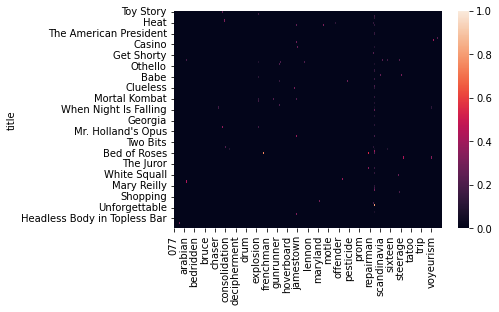

In [33]:
sns.heatmap(tfidf_matrix.iloc[:100])

In [34]:
%%time
cosine_sim = cosine_similarity(tfidf_matrix)

CPU times: user 6min 22s, sys: 22.3 s, total: 6min 44s
Wall time: 1min 22s


In [35]:
cosine_sim

array([[1.        , 0.04156863, 0.00870783, ..., 0.        , 0.        ,
        0.        ],
       [0.04156863, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00870783, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

<AxesSubplot:>

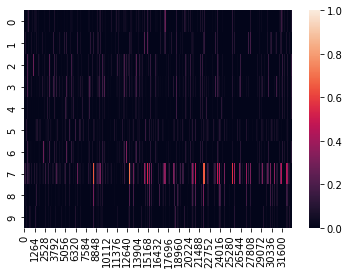

In [37]:
sns.heatmap(cosine_sim[:10])

In [38]:
cosine_sim_df = pd.DataFrame(cosine_sim, index = movie_data.title, columns = movie_data.title)
print(cosine_sim_df.shape)
cosine_sim_df.head()

(32852, 32852)


title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II,Heat,Sabrina,Tom and Huck,Sudden Death,GoldenEye,...,Deep Hearts,The Morning After,House of Horrors,Shadow of the Blair Witch,The Burkittsville 7,Caged Heat 3000,Robin Hood,Betrayal,Satan Triumphant,Queerama
title,,,,,,,,,,,,,,,,,,,,,
Toy Story,1.000000,0.041569,0.008708,0.006937,0.005595,0.000000,0.006456,0.059202,0.000000,0.000000,...,0.0,0.051110,0.028298,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
Jumanji,0.041569,1.000000,0.000000,0.065065,0.000000,0.000000,0.000000,0.165721,0.028302,0.011462,...,0.0,0.000000,0.039299,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
Grumpier Old Men,0.008708,0.000000,1.000000,0.035846,0.010906,0.000000,0.033363,0.000000,0.000000,0.000000,...,0.0,0.099628,0.000000,0.0,0.0,0.0,0.106819,0.000000,0.0,0.0
Waiting to Exhale,0.006937,0.065065,0.035846,1.000000,0.093741,0.003806,0.063686,0.027484,0.000000,0.000000,...,0.0,0.135728,0.000000,0.0,0.0,0.0,0.121701,0.037622,0.0,0.0
Father of the Bride Part II,0.005595,0.000000,0.010906,0.093741,1.000000,0.000000,0.038016,0.000000,0.000000,0.000000,...,0.0,0.064015,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


<AxesSubplot:xlabel='title', ylabel='title'>

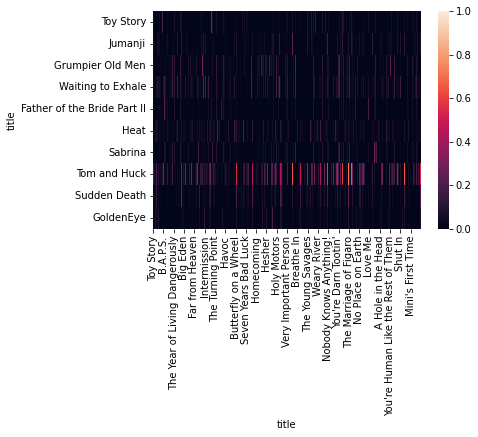

In [39]:
sns.heatmap(cosine_sim_df[:10])

In [40]:
recom_idx = cosine_sim_df.loc[:, 'The Dark Knight Rises'].values.reshape(1,-1).argsort()[:, ::-1].flatten()[1:10+1]

In [42]:
recom_idx

array([10278, 21061,  8478,  1317,   541, 20905,  4527, 30747, 29701,
        1169])

In [47]:
cosine_sim_df.loc[:,'The Dark Knight Rises'].values.reshape(1,-1)# 타깃 영화와 다른 영화들의 유사도 배열을 가져옴

array([[0.        , 0.        , 0.        , ..., 0.12308614, 0.        ,
        0.        ]])

In [53]:
cosine_sim_df.loc[:,'The Dark Knight Rises']

title
Toy Story                      0.000000
Jumanji                        0.000000
Grumpier Old Men               0.000000
Waiting to Exhale              0.007815
Father of the Bride Part II    0.000000
                                 ...   
Caged Heat 3000                0.000000
Robin Hood                     0.081985
Betrayal                       0.123086
Satan Triumphant               0.000000
Queerama                       0.000000
Name: The Dark Knight Rises, Length: 32852, dtype: float64

In [56]:
cosine_sim_df.loc[:,'The Dark Knight Rises'].values[18577]

title
Toy Story                      0.000000
Jumanji                        0.000000
Grumpier Old Men               0.000000
Waiting to Exhale              0.007815
Father of the Bride Part II    0.000000
                                 ...   
Caged Heat 3000                0.000000
Robin Hood                     0.081985
Betrayal                       0.123086
Satan Triumphant               0.000000
Queerama                       0.000000
Name: The Dark Knight Rises, Length: 32852, dtype: float64

In [57]:
cosine_sim_df.loc[:,'The Dark Knight Rises'].values[18577]

0.0

In [58]:
cosine_sim_df.loc[:,'The Dark Knight Rises'].values[14315]


1.0

In [60]:
cosine_sim_df.loc[:,'The Dark Knight Rises'].values[13659]


0.171802980736784

In [51]:
cosine_sim_df.loc[:,'The Dark Knight Rises'].values.reshape(1,-1).argsort()

array([[    0, 18577, 18575, ..., 21061, 10278, 14315]])

In [52]:
cosine_sim_df.loc[:,'The Dark Knight Rises'].values.reshape(1,-1).argsort()[:, ::-1]

array([[14315, 10278, 21061, ..., 18575, 18577,     0]])

In [88]:
cosine_sim_df.loc[:,'The Dark Knight Rises'].values.reshape(1,-1).argsort()[:, ::-1].flatten()

array([14315, 10278, 21061, ..., 18575, 18577,     0])

In [89]:
cosine_sim_df.loc[:,'The Dark Knight Rises'].values.reshape(1,-1).argsort()[:, ::-1].flatten()[1:11]

array([10278, 21061,  8478,  1317,   541, 20905,  4527, 30747, 29701,
        1169])

In [90]:
recom_title = movie_data.iloc[recom_idx, :].title.values
recom_title

array(['The Dark Knight', 'The Burglar', 'Batman Begins',
       'Batman & Robin', 'Batman', 'Raffles', 'Hero at Large',
       'DC Showcase: Catwoman', 'DC Super Hero Girls: Hero of the Year',
       'Batman Returns'], dtype=object)

In [ ]:
def genre_recommendations(target_title, matrix, items, k=10):
    recom_idx = matrix.loc[:, target_title].values.reshape(1, -1).argsort()[:, ::-1].flatten()[1:k+1]#타깃 영화와 다른 영화의 유사도를 가져옴, 유사도가 높은것부터 나열, 자기 자신은 1이니까 제일높으므로 자기를 빼고 k개 만큼 가져옴
    recom_title = items.iloc[recom_idx, :].title.values# 추천 목록에서 데이터 정보를 가저옴
    recom_genre = items.iloc[recom_idx, :].genres.values# 추천 목록에서 데이터 정보를 가저옴
    target_title_list = np.full(len(range(k)), target_title)# 단순 반복 및 채움
    target_genre_list = np.full(len(range(k)), items[items.title == target_title].genres.values)# 단순 반복 및 채움
    d = {
        'target_title':target_title_list,
        'target_genre':target_genre_list,
        'recom_title' : recom_title,
        'recom_genre' : recom_genre
    }
    return pd.DataFrame(d)